#### Notebook to enquire into the differences in corpus between high rating reviews, and low rating reviews; how similar are reviews by the words

In [1]:
from drug_objects import drug, review, drug_dataset

In [2]:
import sys, pickle, re
from collections import Counter, OrderedDict
import pandas as pd 
import numpy as np


In [3]:
from data_fxns import merge_generics

small_drug_list = pickle.load(open('drug_list_ddc_pg1.p', 'rb'))
merged_drugs, merged_datasets = merge_generics(small_drug_list)
ind = 5
one_drug = merged_drugs[ind]
dataset = merged_datasets[ind]

duloxetine systemic 950 897
sertraline systemic 1225 1151
escitalopram systemic 1050 985
fluoxetine systemic 750 702
citalopram systemic 825 775
bupropion systemic 1300 1207
aripiprazole systemic 250 237
venlafaxine systemic 1000 947
desvenlafaxine systemic 600 557
mirtazapine systemic 325 302
vilazodone systemic 525 485


In [4]:
from data_fxns import binning_fxn as binning_fxn

bin_conversion = OrderedDict({1:'1-2', 2:'1-2', 3:'3-4', 4:'3-4',5:'5-6', 6:'5-6', 7:'7-8', 8:'7-8', 9:'9-10', 10:'9-10'})
labels, target_names = binning_fxn(bin_conversion, dataset)

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df=1, stop_words='english')
vect_corpus = vectorizer.fit_transform(dataset.data)

In [21]:
#Latent Symantic Indexing
from sklearn.decomposition import TruncatedSVD

# Compute the SVD (using TruncatedSVD) of the vectorized corpus
N_COMPONENTS = 100  

tSVD = TruncatedSVD(n_components=N_COMPONENTS, random_state=42)
LSI_corpus = tSVD.fit_transform(vect_corpus)

In [23]:
''' 
Prints scores of the 'N_MOST_SIMILAR' documents closest to document 'ind'

Suggests that the documents with different scores may be closer by cosine similarity
than documents with the same score. 
'''
import  sklearn.metrics.pairwise as smp
N_MOST_SIMILAR = 10
ind = 8

def get_similar_docs(doc, red_corpus, num_hits):#, title_set): 
    similarities = smp.cosine_similarity(red_corpus)
    comps = similarities[doc].argsort()[-num_hits-1:-1]
    return comps

comps = get_similar_docs(ind, LSI_corpus, N_MOST_SIMILAR)

print(labels[ind], '; ', [labels[ik] for ik in comps])

2 ;  [5, 4, 4, 5, 5, 5, 3, 5, 5, 2]


In [24]:
#Plot embedded in 2D to check spread

# So that the plot below works, set the 2D embedding of your corpus (i.e., the result of LSI) to be named embedded_2d_corpus
tsvd2 = TruncatedSVD(n_components=2)

embedded_2d_corpus = tsvd2.fit_transform(LSI_corpus)

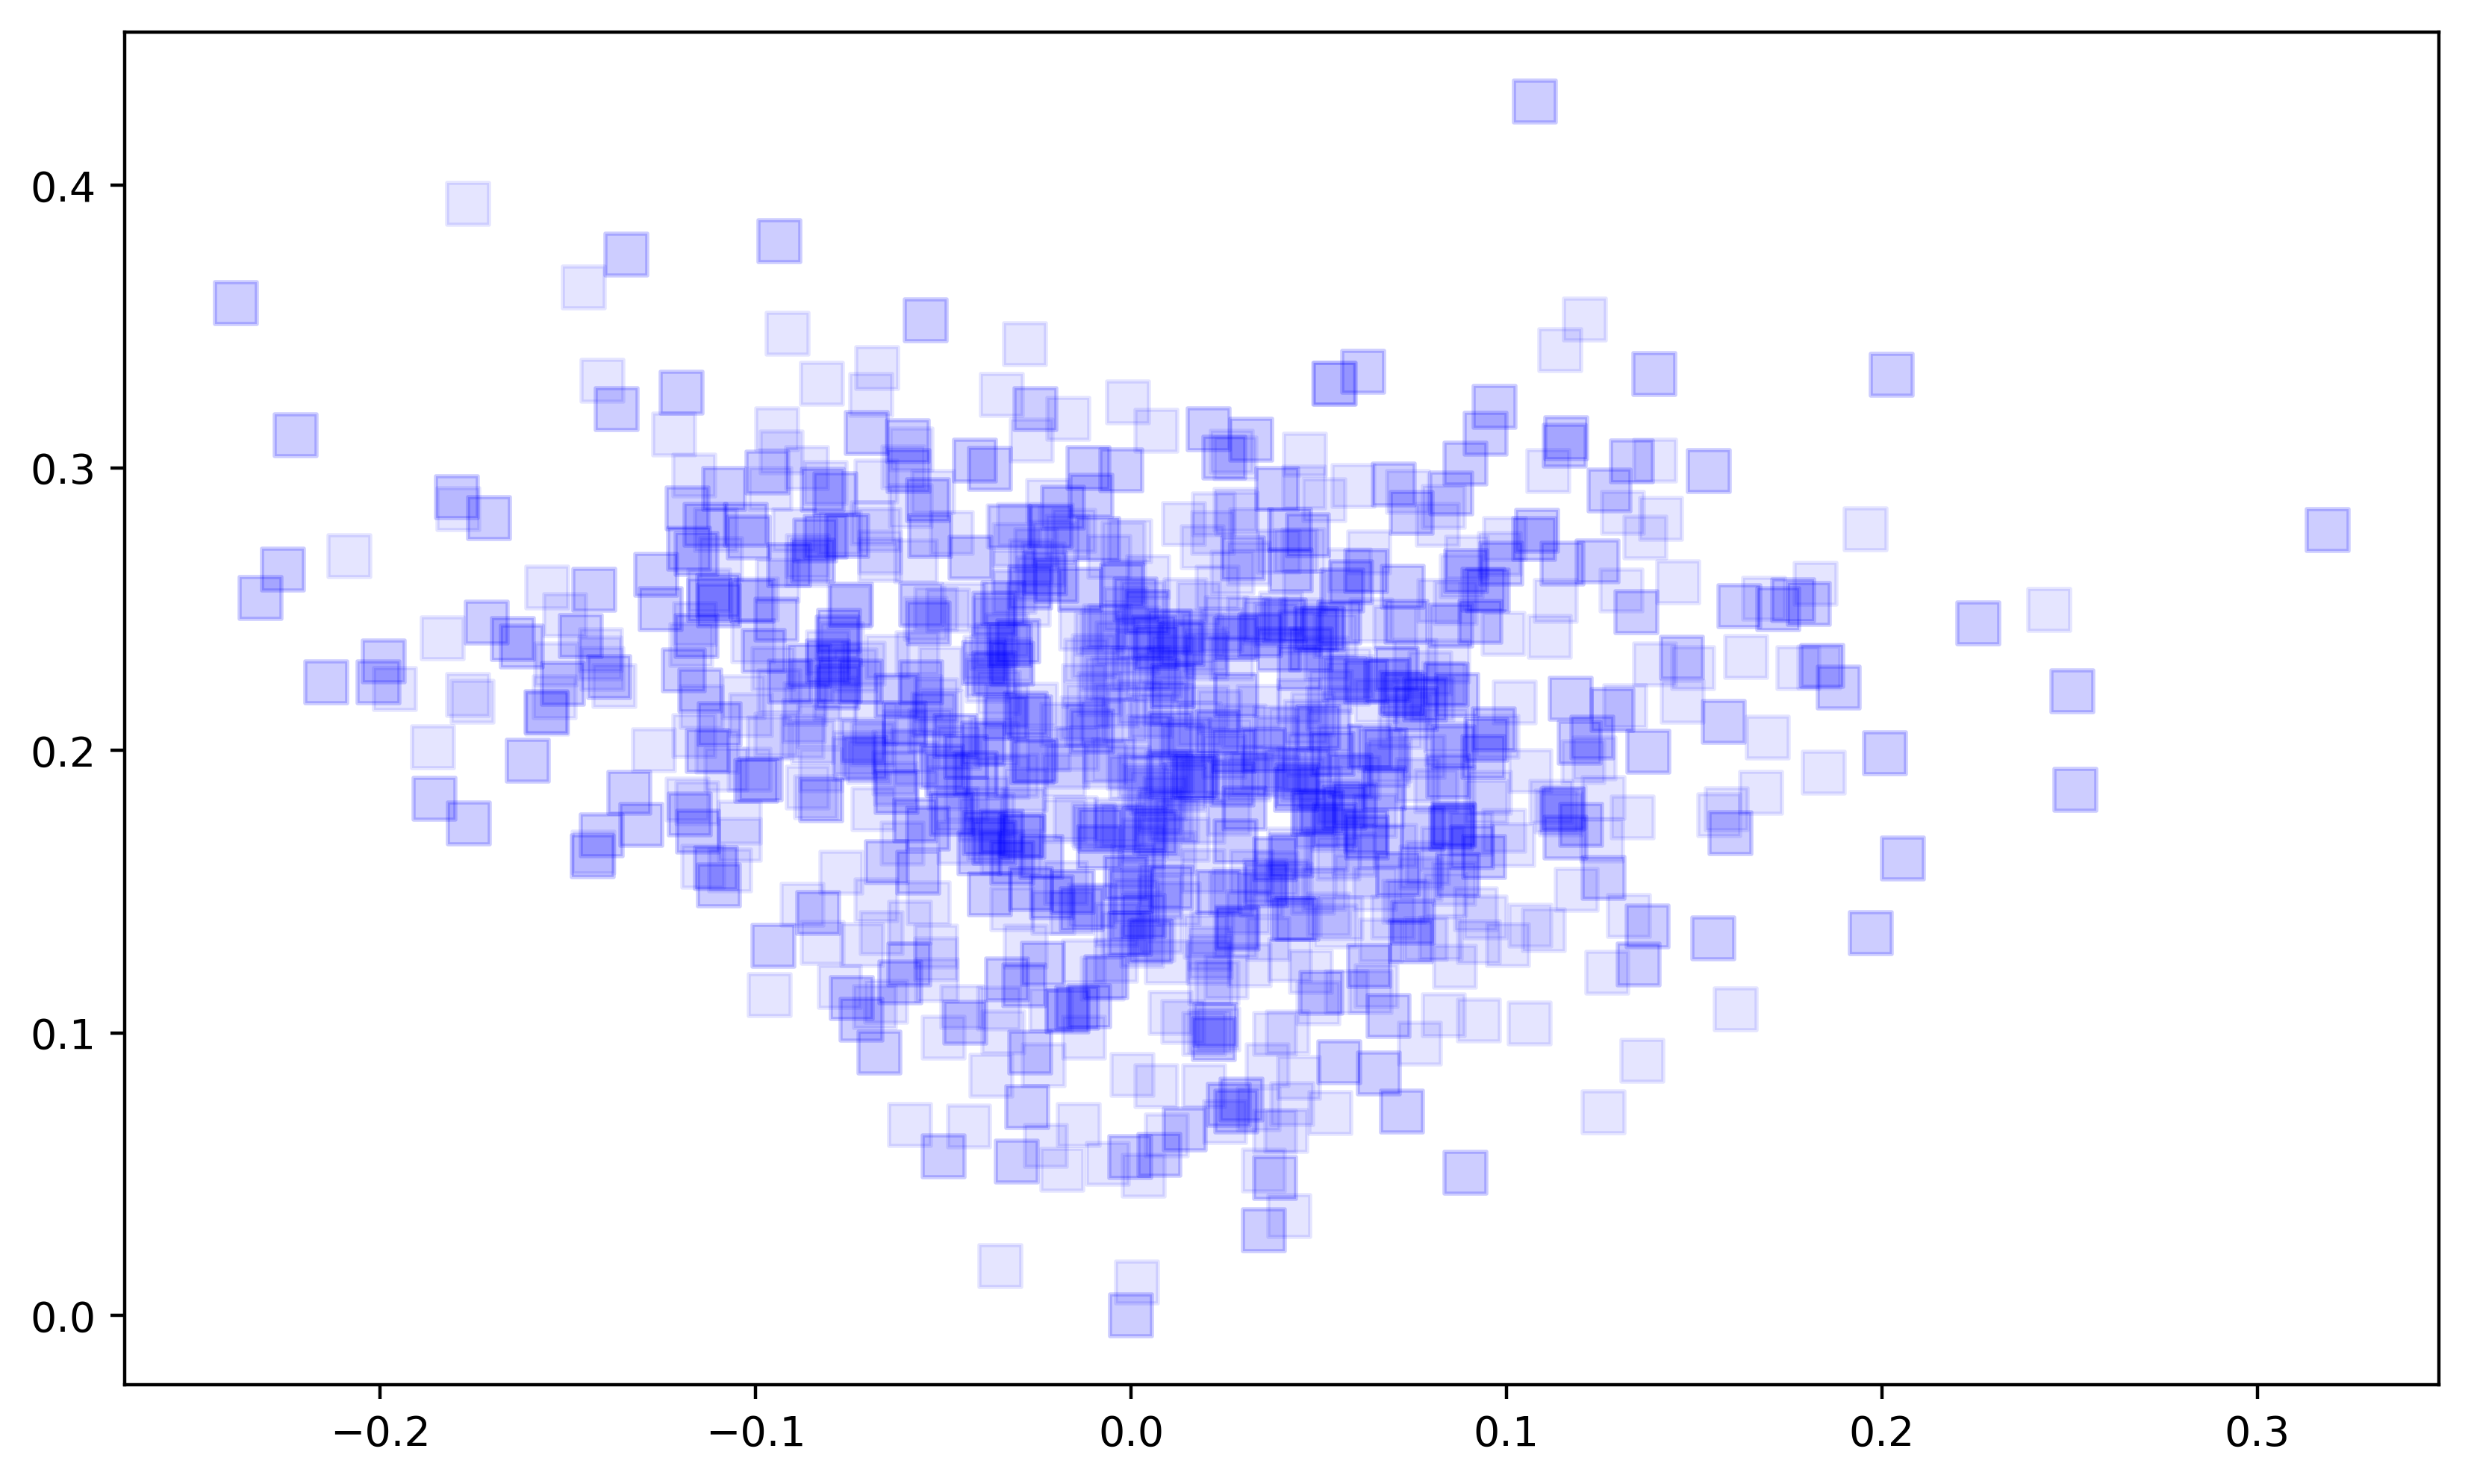

In [30]:
import matplotlib.pyplot as plt
import pylab as pl

%matplotlib inline

# matplotlib makes us plot y-values vs x-values, 
# so we put the second column of embedded_2d_corpus in the y-values 
# and we put the first column in the x-values
plt1 = pl.figure(figsize=(10, 6), dpi=400)
ax = plt1.add_subplot(111)# ,xlim=xlims, ylim = ylims)#, xlim=(0,4.5))#, ylim=(-.5,4.5)) #autoscale_on=False, xlim=(-.5,5), )
ax.scatter(embedded_2d_corpus[:,1], embedded_2d_corpus[:,0], marker = 's', s = 100, alpha = .1, c ='b')


pl.show()

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer


count_vect = CountVectorizer(lowercase=True, ngram_range=(1,2), stop_words='english')
transformer = TfidfTransformer()

X = count_vect.fit_transform(dataset.data)
X_tfidf = transformer.fit_transform(X)

In [29]:
'''
Print (word, % of documents) from the count_vectorizer data
'''
matrix = count_vect.fit_transform(dataset.data)
freqs = [(word, vect_corpus.getcol(idx).sum()) for word, idx in count_vect.vocabulary_.items()]
#sort from largest to smallest
print(sorted (freqs, key = lambda x: -x[1]))

[('wellbutrin', 53.712994363581203), ('depression', 44.586457265640782), ('feel', 44.47672894536931), ('day', 40.639994726468252), ('effects', 38.857320909136163), ('taking', 38.31371014646551), ('like', 35.626397084913023), ('ve', 35.513058759958994), ('anxiety', 34.345454951271208), ('started', 33.785610295521309), ('life', 31.605820754294463), ('medication', 30.126232169613406), ('years', 30.045523400996352), ('better', 29.10934114816779), ('just', 28.697576632378741), ('weeks', 27.964843213393351), ('time', 25.98557867662549), ('days', 25.713705924417198), ('months', 25.340468375051085), ('felt', 25.224588219981726), ('really', 25.170439636201934), ('weight', 24.079166017340139), ('week', 23.94261458249817), ('energy', 23.406651036673537), ('mg', 22.609370071089089), ('did', 22.435313195532171), ('doctor', 21.622040101976381), ('medicine', 21.136300063184571), ('xl', 21.116571457378807), ('don', 20.582114856377189), ('good', 20.581228622395876), ('didn', 19.780779581631649), ('feel